In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import SGD, Adam

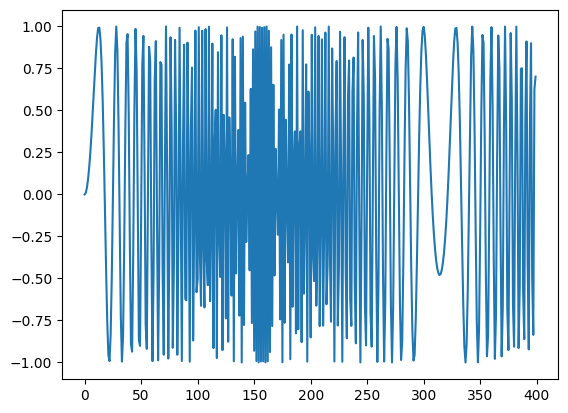

In [11]:
#Difficult signal that the linear model can't solve
series = np.sin((0.1 * np.arange(400)) ** 2)
plt.plot(series)
plt.show()

In [12]:
#Building the dataset: 
T = 10 #10 previous time steps to predict next time step
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t : t + T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape = ", X.shape)
print("Y.shape = ", Y.shape)

X.shape =  (390, 10)
Y.shape =  (390,)


In [13]:
#Trying autoregressive linear model
#observe that loss remains high
i = Input(shape = (T,))
x = Dense(1)(i)

model = Model(i, x)

model.compile(
    loss = 'mse',
    optimizer = Adam(lr = 0.1)
)

r = model.fit(
    X[: -N // 2], Y[: -N // 2], #model trains on first half of sequence and validates on second half as a random split will not make sense
    epochs = 80,
    validation_data = (X[-N // 2:], Y[-N // 2:])
)

Epoch 1/80


c:\Users\91959\anaconda3\envs\tf2.10\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


7/7 [==============================] - 0s 28ms/step - loss: 1.3399 - val_loss: 0.5076
Epoch 2/80
7/7 [==============================] - 0s 11ms/step - loss: 0.5815 - val_loss: 0.8650
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 0.6676 - val_loss: 0.7845
Epoch 4/80
7/7 [==============================] - 0s 11ms/step - loss: 0.5365 - val_loss: 0.6182
Epoch 5/80
7/7 [==============================] - 0s 11ms/step - loss: 0.5358 - val_loss: 0.5885
Epoch 6/80
7/7 [==============================] - 0s 11ms/step - loss: 0.5320 - val_loss: 0.6192
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.5325 - val_loss: 0.6535
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.5306 - val_loss: 0.7173
Epoch 9/80
7/7 [==============================] - 0s 11ms/step - loss: 0.6056 - val_loss: 0.6631
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.5439 - val_loss: 0.6135
Epoch 11/80
7/7 [=======================

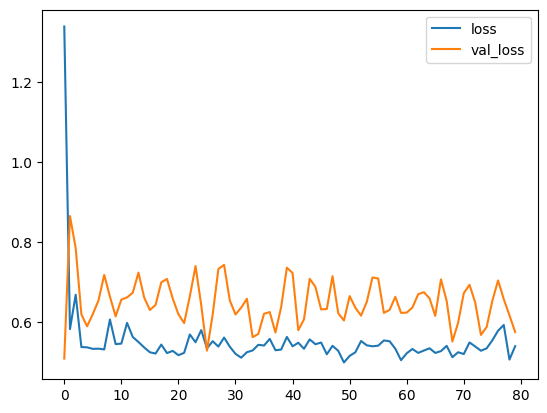

In [14]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 21ms/step


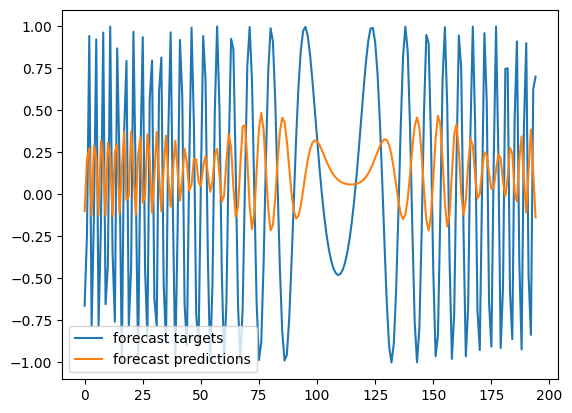

In [15]:
#Wrong way to forecast: Using only given values to predict future
#Even in this 1 step forecast it is evident that model performs poorly.
val_target = Y[-N//2:]
val_prediction = []
i = -N // 2
while len(val_prediction) < len(val_target):
  p = model.predict(X[i].reshape(1, -1))[0, 0] #input should be 2-D(matrix), output is also a matrix.
  val_prediction.append(p)
  i += 1
  
plt.plot(val_target, label = 'forecast targets')
plt.plot(val_prediction, label = 'forecast predictions')
plt.legend()
plt.show()

1/1 [==============================] - 0s 21ms/step


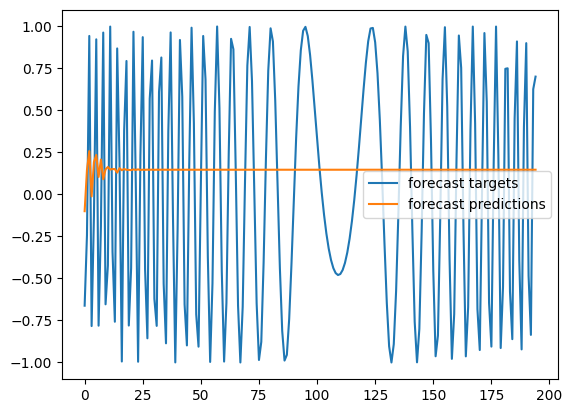

In [16]:
#Correct method of forecasting future values:
#We observe that the linear model performs terribly
val_target = Y[-N//2:]
val_prediction = []
last_x = X[-N // 2]
while len(val_prediction) < len(val_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0]
  val_prediction.append(p)
  last_x = np.roll(last_x, -1) #Circular left shift of 1D array
  last_x[-1] = p #Replacing last element with latest prediction
  
plt.plot(val_target, label = 'forecast targets')
plt.plot(val_prediction, label = 'forecast predictions')
plt.legend()
plt.show()

In [30]:
#RNN/LSTM model:
X = X.reshape(-1, T, 1)

i = Input(shape = (T, D))
x = LSTM(10)(i) #This layer has to be changed(LSTM/SimpleRNN) to implement either.
x = Dense(1)(x)

model = Model(i, x)

model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate = 0.05)
)
r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size = 32,
    validation_data = (X[-N//2:], Y[-N//2:]),
    epochs = 200
)

Epoch 1/200
7/7 [==============================] - 5s 82ms/step - loss: 0.5583 - val_loss: 0.5388
Epoch 2/200
7/7 [==============================] - 0s 15ms/step - loss: 0.5078 - val_loss: 0.5656
Epoch 3/200
7/7 [==============================] - 0s 15ms/step - loss: 0.4880 - val_loss: 0.5981
Epoch 4/200
7/7 [==============================] - 0s 15ms/step - loss: 0.4473 - val_loss: 0.5595
Epoch 5/200
7/7 [==============================] - 0s 15ms/step - loss: 0.4034 - val_loss: 0.5166
Epoch 6/200
7/7 [==============================] - 0s 15ms/step - loss: 0.3679 - val_loss: 0.4532
Epoch 7/200
7/7 [==============================] - 0s 14ms/step - loss: 0.2676 - val_loss: 0.3173
Epoch 8/200
7/7 [==============================] - 0s 15ms/step - loss: 0.1864 - val_loss: 0.2239
Epoch 9/200
7/7 [==============================] - 0s 15ms/step - loss: 0.1147 - val_loss: 0.2217
Epoch 10/200
7/7 [==============================] - 0s 15ms/step - loss: 0.0722 - val_loss: 0.1551
Epoch 11/200
7/7 [=

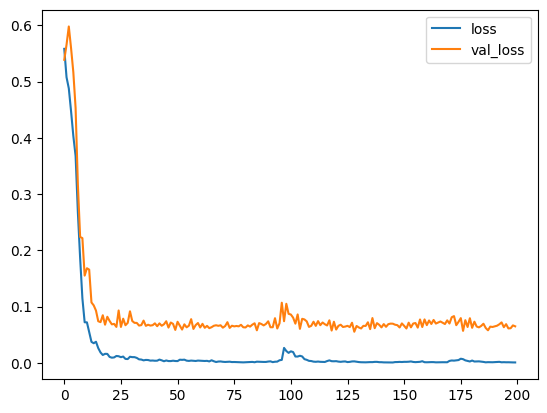

In [31]:
#Loss : LSTM < SimpleRNN < Linear
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

13/13 [==============================] - 0s 3ms/step
(390, 1)


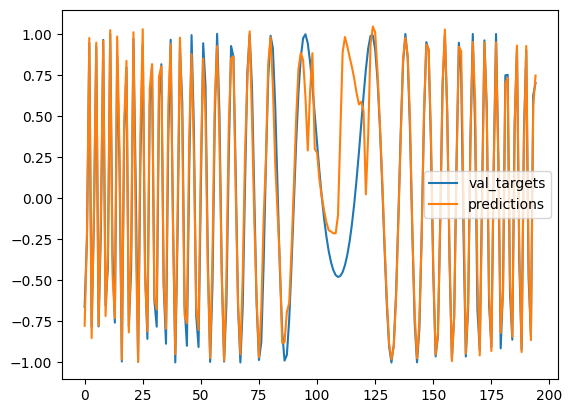

In [32]:
#1 step predictions(wrong way to forecast):
#SimpleRNN: Even though the model did not see the low frequency part of the curve during training, it still predicted it pretty well.
#LSTM: Performs even better
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[-N//2:, 0]

plt.plot(Y[-N//2:], label = 'val_targets')
plt.plot(predictions, label = 'predictions')
plt.legend()
plt.show()

1/1 [==============================] - 0s 21ms/step


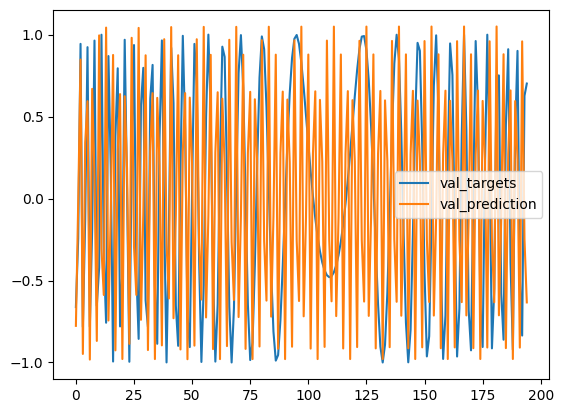

In [33]:
#Multi-step forecast(correct way):
#SimpleRNN an LSTM: Appears to perform well in the beginning, but does not predict the curve slowing down.
#LSTM performs slightly better than SimpleRNN, and both perform better than linear model.
forecast = []
input = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
    p = model.predict(input.reshape(1, T, D))[0][0]
    forecast.append(p)
    input = np.roll(input, -1)
    input[-1] = p
    
plt.plot(Y[-N//2:], label = 'val_targets')
plt.plot(forecast, label = 'val_prediction')
plt.legend()
plt.show()

We conclude that LSTMs are better than RNNs for learning longer term dependencies, but they are not simply better at everything. There is a point where even LSTMs forget, albeit that point comes further than the Simple RNN. The curve used above does not really have any long term dependencies, which is why we barely see any advantage of using LSTM here over RNN.